In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette([
    "#0b2e4a",  # Deep navy blue
    "#1d4e89",  # Dark steel blue
    "#2c7fb8",  # Medium business blue
    "#4aaed9",  # Calm sky blue
    "#7fcdbb",  # Soft teal-blue
    "#bae4eb",  # Pale ice blue
    "#e0f3f8",  # Very pale blue
])



import warnings
warnings.filterwarnings('ignore')


sns.set_palette(palette)
sns.set_style("whitegrid")

df=pd.read_csv('Airline_Delay_Cause.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

In [ ]:
print(f"Dataset Shape: {df.shape}")

print("\nColumn Data Types:")
print(df.dtypes)

print("\nMissing Values:")
missing = df.isnull().sum()
print(missing)

print("\nSummary Statistics:")
display(df.describe(include='all'))


Dataset Shape: (179338, 21)

Column Data Types:
year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

Missing Values:
year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,179338.000000,179338.000000,179338,179338,179338,179338,178997.000000,178747.000000,178997.000000,178997.000000,...,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000
unique,NaN,NaN,29,39,396,420,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,OO,SkyWest Airlines Inc.,CLE,"Cleveland, OH: Cleveland-Hopkins International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,23821,23821,1593,1593,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2019.480082,6.485725,NaN,NaN,NaN,NaN,327.816969,58.709086,18.572643,2.035742,...,0.145307,20.778477,6.830103,0.779572,3863.310676,1325.546199,209.113426,819.949284,6.839941,1501.854875
std,2.410204,3.463516,NaN,NaN,NaN,NaN,931.001446,164.378035,47.389651,6.894812,...,0.702149,64.912766,41.446756,3.490499,11902.153241,4067.786987,791.817638,3178.603458,40.440497,4878.178427
min,2015.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,NaN,NaN,NaN,NaN,41.000000,6.000000,1.960000,0.000000,...,0.000000,1.000000,0.000000,0.000000,288.000000,91.000000,0.000000,28.000000,0.000000,54.000000
50%,2020.000000,6.000000,NaN,NaN,NaN,NaN,89.000000,15.000000,5.400000,0.220000,...,0.000000,4.290000,1.000000,0.000000,900.000000,321.000000,12.000000,124.000000,0.000000,286.000000
75%,2022.000000,9.000000,NaN,NaN,NaN,NaN,218.000000,40.000000,14.700000,1.620000,...,0.000000,13.010000,3.000000,1.000000,2547.000000,986.000000,131.000000,401.000000,0.000000,964.000000


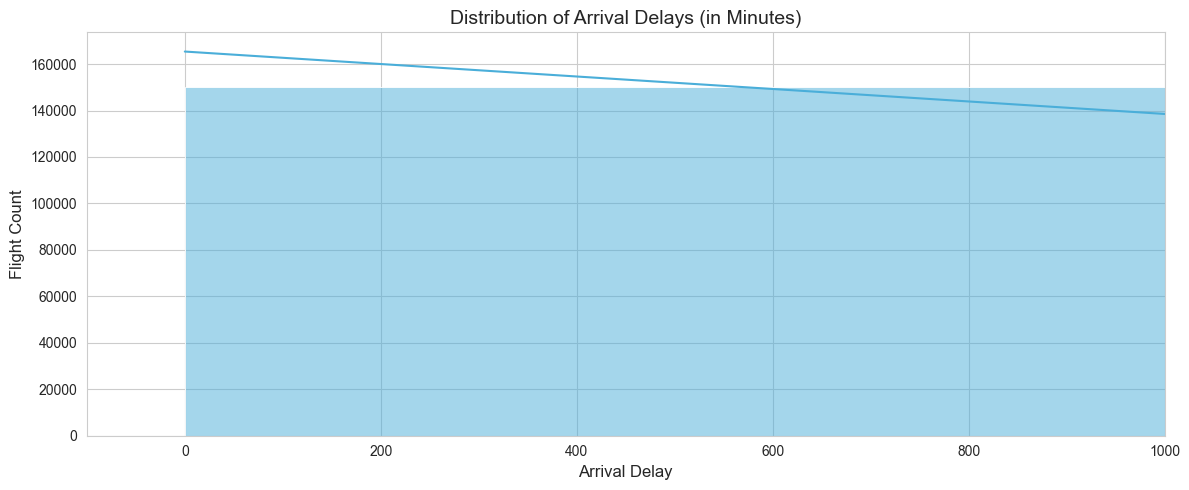

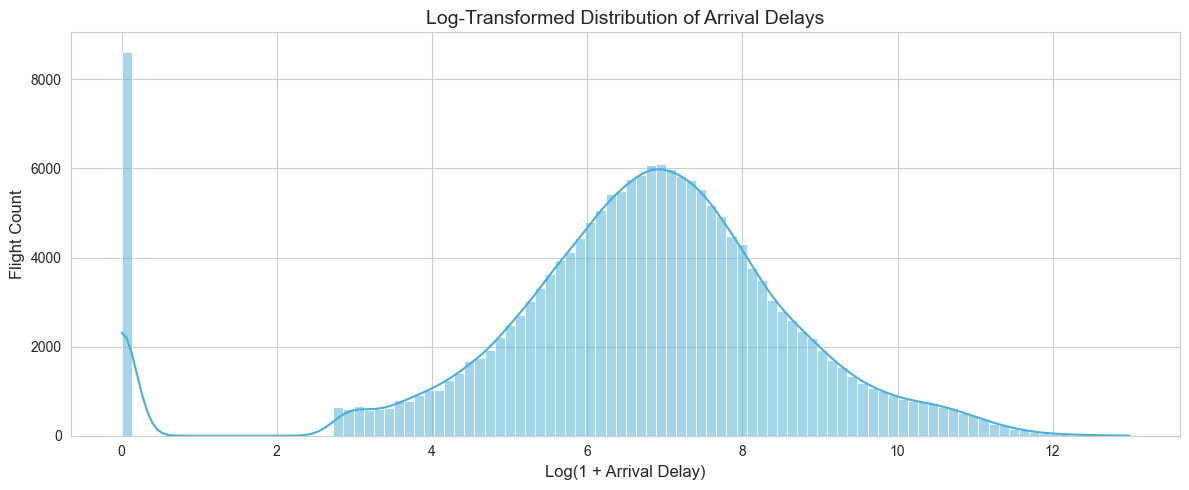

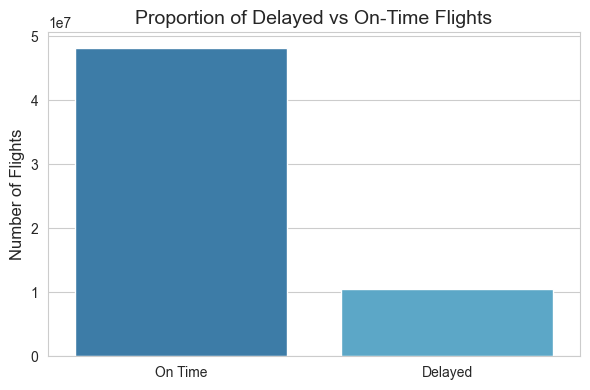


📌 Percent of flights delayed (>15 min): 17.88%


In [ ]:
# 1. Distribution of Arrival Delays
plt.figure(figsize=(12, 5))
sns.histplot(df['arr_delay'].dropna(), bins=100, kde=True, color=palette[3])
plt.title("Distribution of Arrival Delays (in Minutes)", fontsize=14)
plt.xlabel("Arrival Delay", fontsize=12)
plt.ylabel("Flight Count", fontsize=12)
plt.xlim(-100, 1000)
plt.tight_layout()
plt.savefig('p1.png')
plt.show()

# 2. Log-transformed Delay Distribution
plt.figure(figsize=(12, 5))
sns.histplot(np.log1p(df['arr_delay'].dropna()), bins=100, kde=True, color=palette[3])
plt.title("Log-Transformed Distribution of Arrival Delays", fontsize=14)
plt.xlabel("Log(1 + Arrival Delay)", fontsize=12)
plt.ylabel("Flight Count", fontsize=12)
plt.tight_layout()
plt.savefig('p2.png')
plt.show()

# Calculating total delayed and total flights
total_delayed = df['arr_del15'].sum()
total_flights = df['arr_flights'].sum()

delay_ratio = total_delayed / total_flights * 100

# 3. Bar plot of delayed vs on-time
plt.figure(figsize=(6, 4))
sns.barplot(
    x=["On Time", "Delayed"],
    y=[total_flights - total_delayed, total_delayed],
    palette=[palette[2], palette[3]]
)
plt.title("Proportion of Delayed vs On-Time Flights", fontsize=14)
plt.ylabel("Number of Flights", fontsize=12)
plt.xlabel("")
plt.tight_layout()
plt.savefig('p3_corrected.png')
plt.show()

# Print percentage
print(f"\n📌 Percent of flights delayed (>15 min): {delay_ratio:.2f}%")




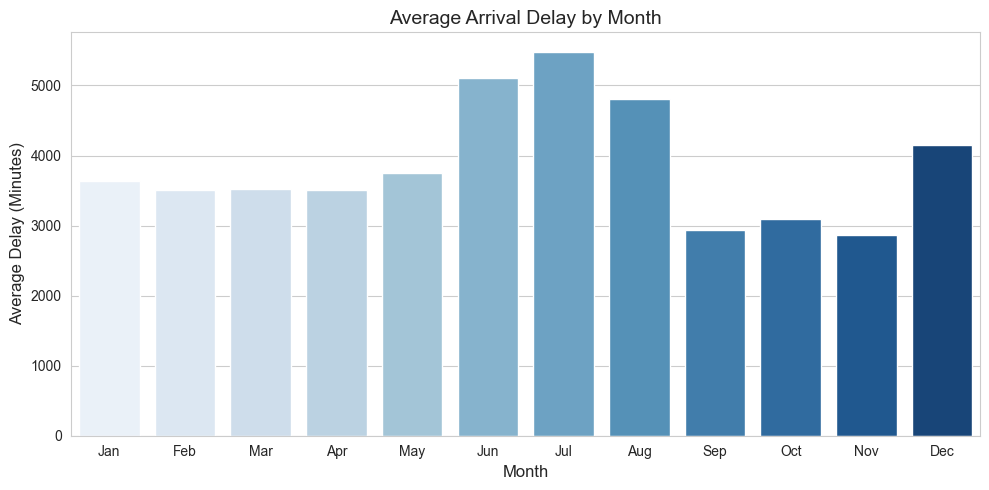

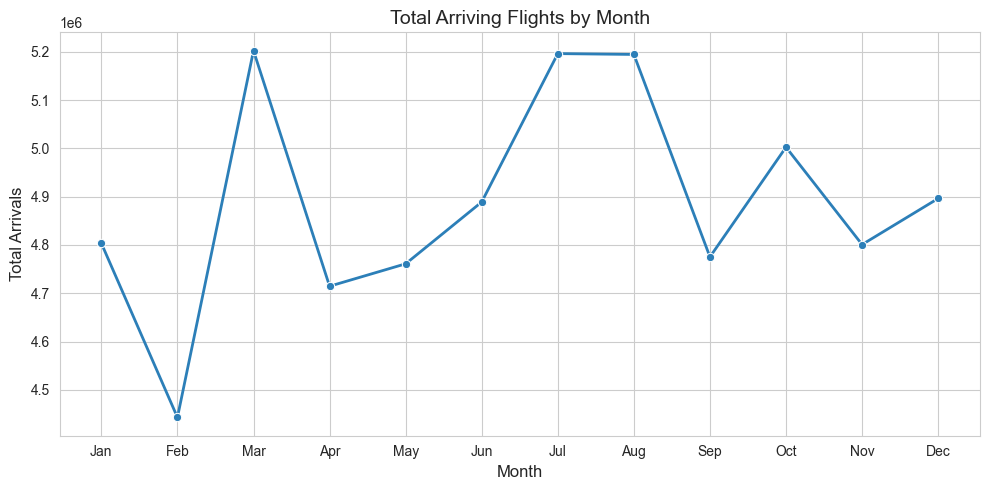

In [ ]:
monthly_delay = df.groupby('month')['arr_delay'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='arr_delay', data=monthly_delay, palette="Blues")
plt.title("Average Arrival Delay by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Delay (Minutes)", fontsize=12)
plt.xticks(range(0, 12), [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.savefig('p4.png')
plt.show()

# Monthly flight volume
monthly_flights = df.groupby('month')['arr_flights'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='arr_flights', data=monthly_flights, marker='o', linewidth=2, color=palette[2])
plt.title("Total Arriving Flights by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Arrivals", fontsize=12)
plt.xticks(range(1, 13), [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.show()


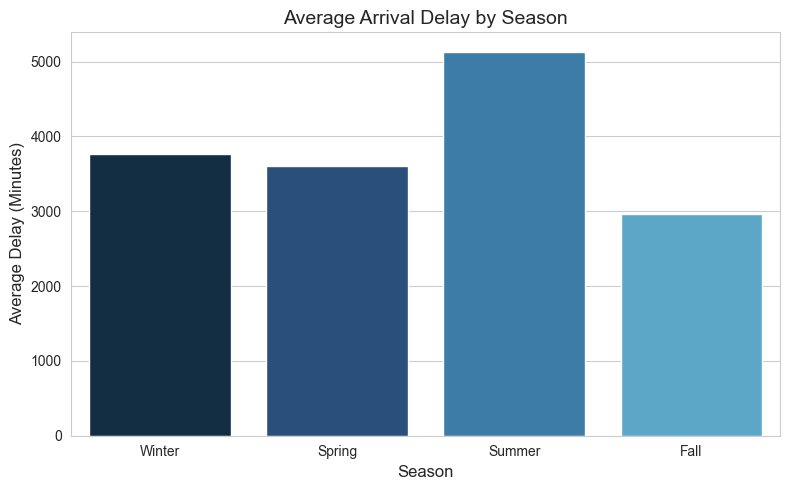

In [ ]:
# Season Column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

# Average delay by season
season_delay = df.groupby('season')['arr_delay'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall']).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='arr_delay', data=season_delay, palette=palette)
plt.title("Average Arrival Delay by Season", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Delay (Minutes)", fontsize=12)
plt.tight_layout()
plt.savefig('seasons.png')
plt.show()



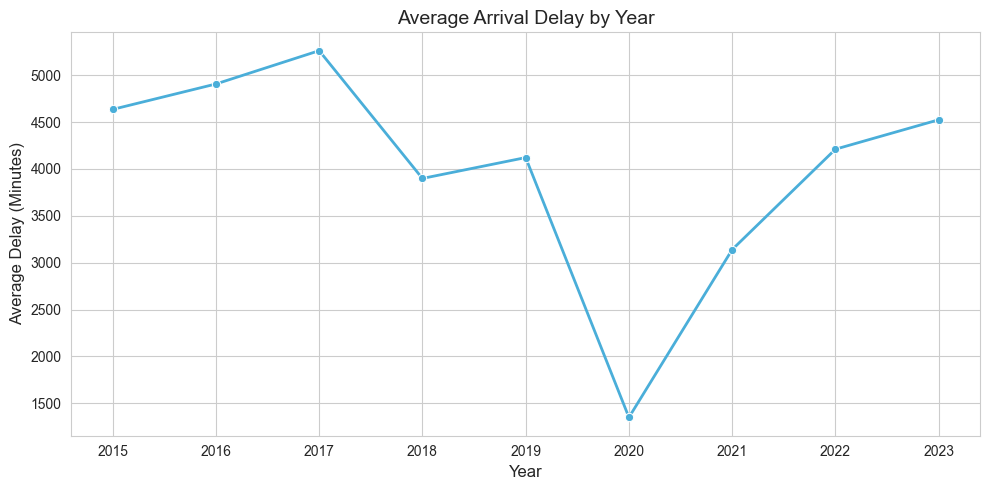

In [ ]:
# Yearly Delay Trend
yearly_delay = df.groupby('year')['arr_delay'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='arr_delay', data=yearly_delay, marker='o', linewidth=2, color=palette[3])
plt.title("Average Arrival Delay by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Delay (Minutes)", fontsize=12)
plt.xticks(yearly_delay['year'].unique())
plt.tight_layout()
plt.savefig('p7.png')

plt.show()


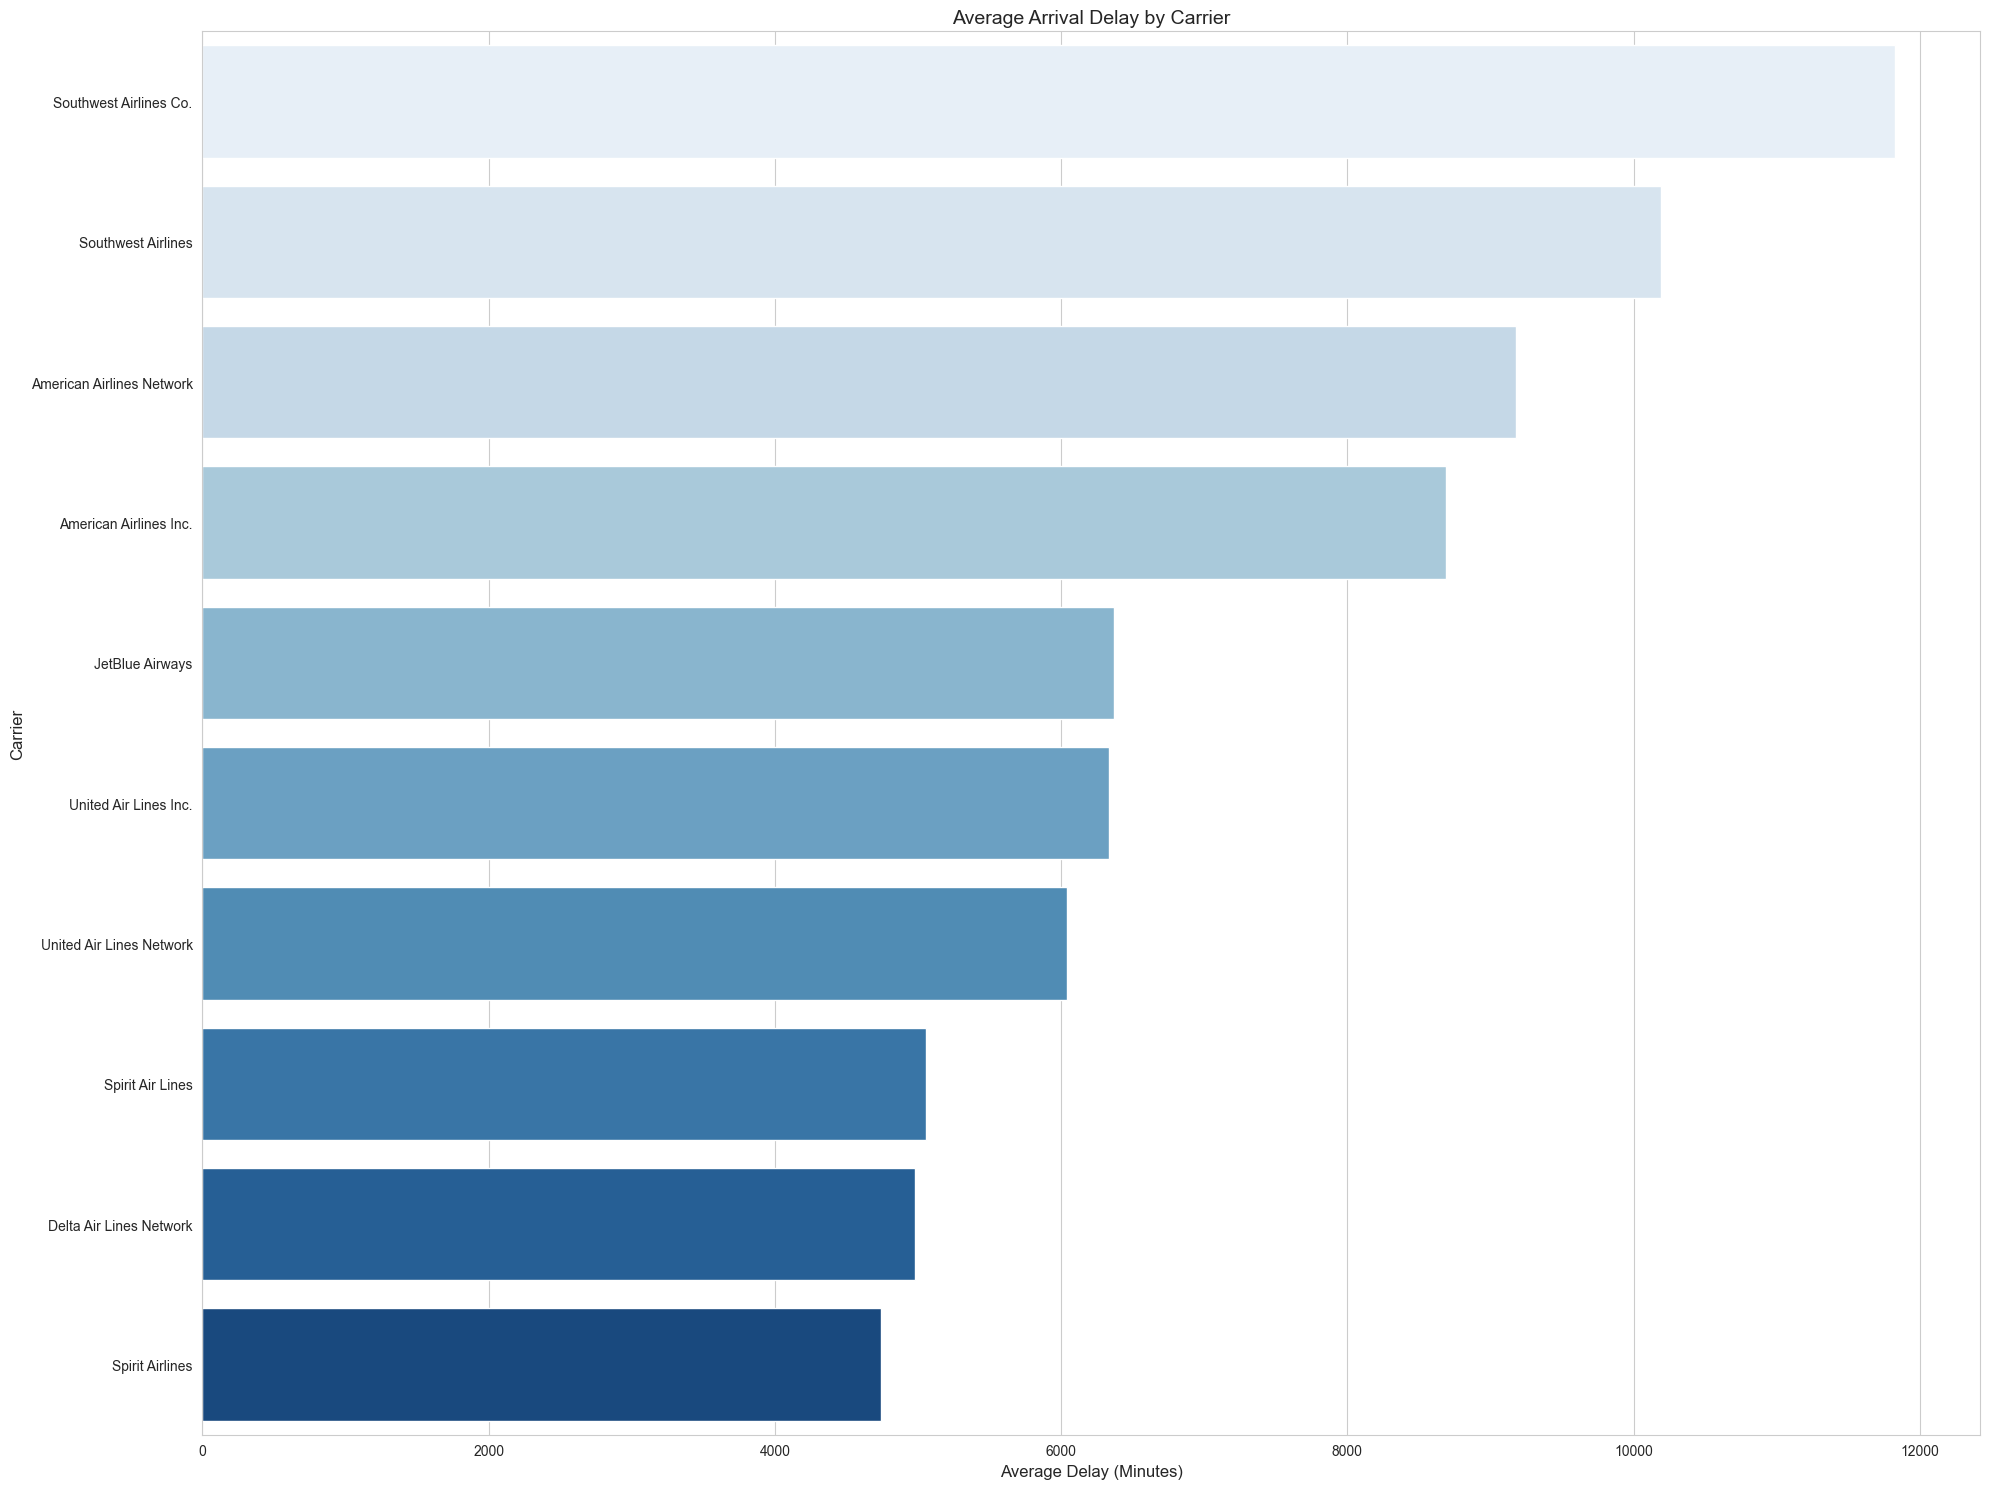

In [ ]:
# Average Delay by Carrier
carrier_delay = df.groupby('carrier_name')[['arr_delay', 'arr_del15', 'arr_flights']].mean().sort_values(by='arr_delay', ascending=False).head(10)


plt.figure(figsize=(20,15))
sns.barplot(
    data=carrier_delay,
    y='carrier_name',
    x='arr_delay',
    palette="Blues"
)
plt.title("Average Arrival Delay by Carrier", fontsize=14)
plt.xlabel("Average Delay (Minutes)", fontsize=12)
plt.ylabel("Carrier", fontsize=12)
plt.tight_layout()
plt.savefig('my_plot.png')
plt.show()


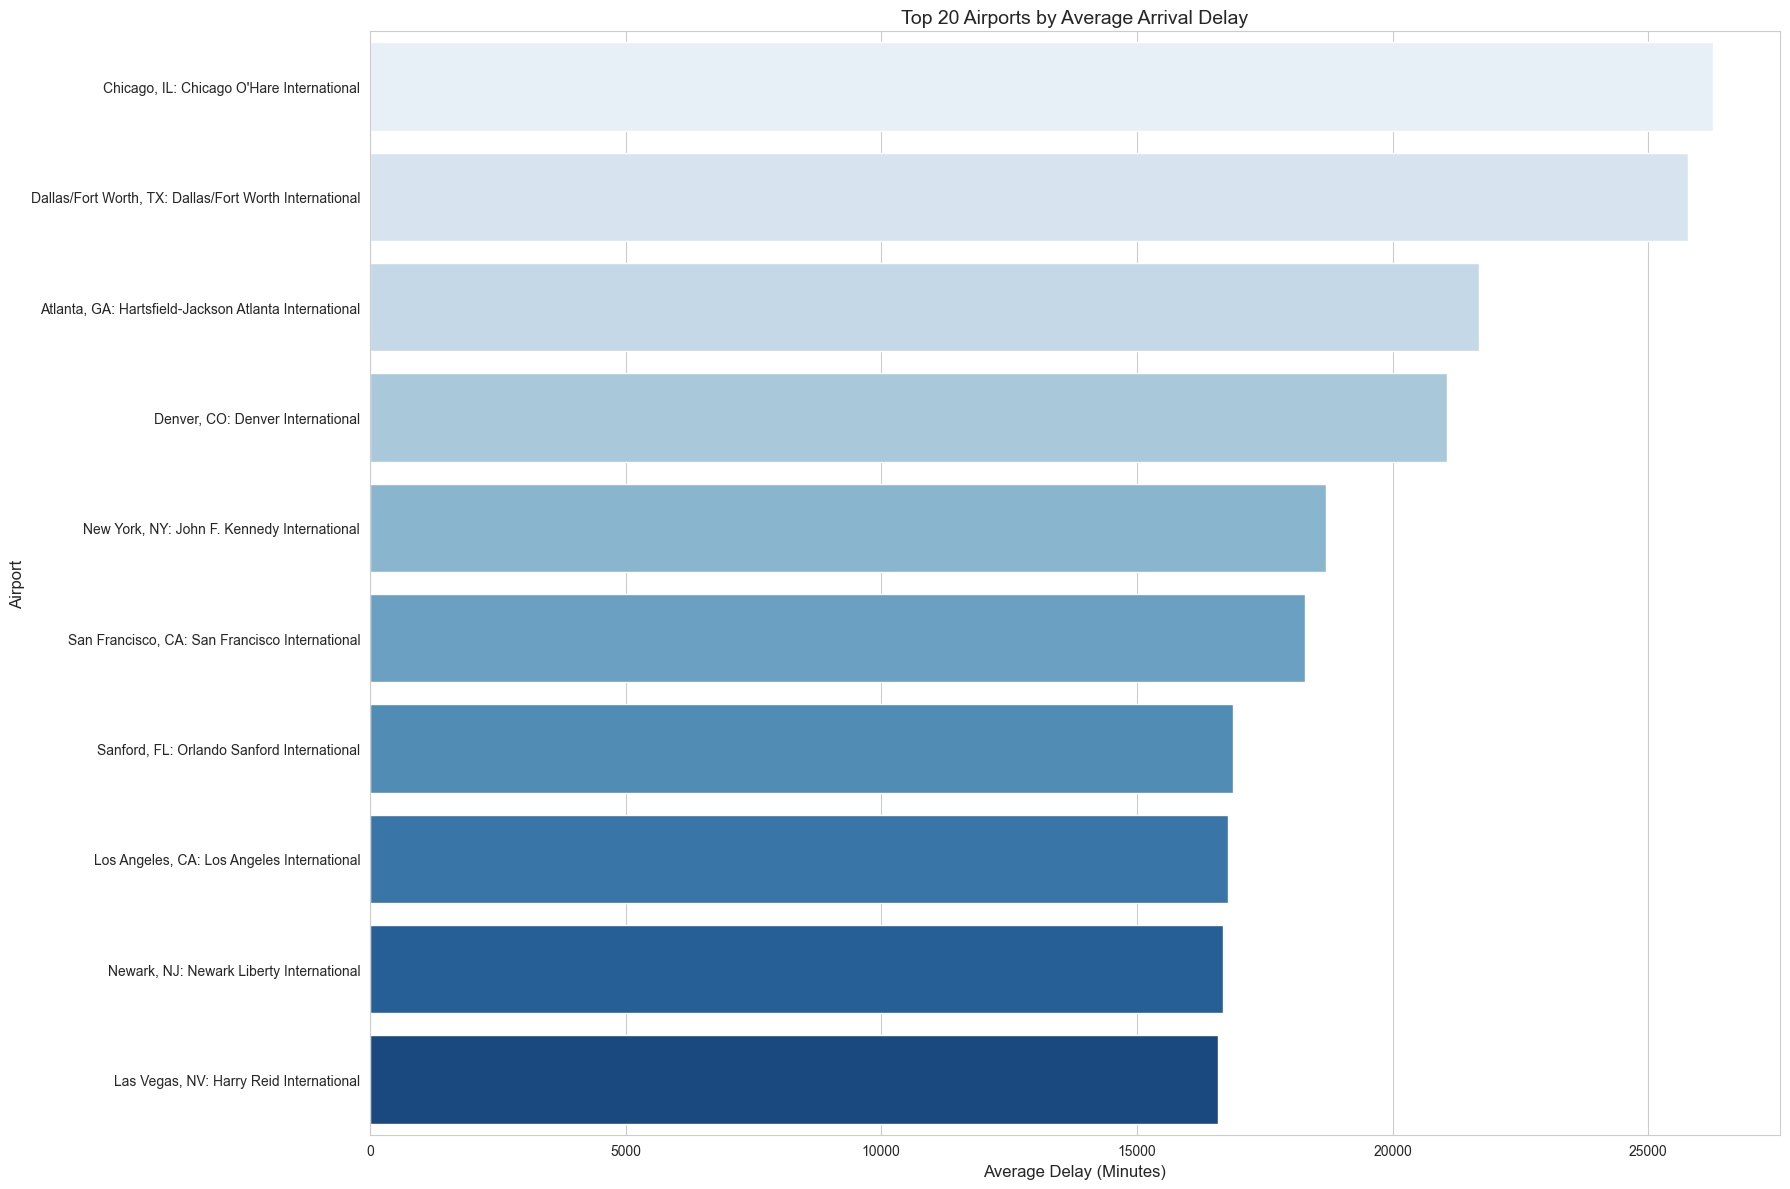

In [ ]:
# Average Delay by Airport
airport_delay = df.groupby('airport_name')['arr_delay'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(18, 12))
sns.barplot(
    data=airport_delay,
    y='airport_name',
    x='arr_delay',
    palette="Blues"
)
plt.title("Top 20 Airports by Average Arrival Delay", fontsize=14)
plt.xlabel("Average Delay (Minutes)", fontsize=12)
plt.ylabel("Airport", fontsize=12)
plt.tight_layout()
plt.savefig('my_plot1.png')
plt.show()


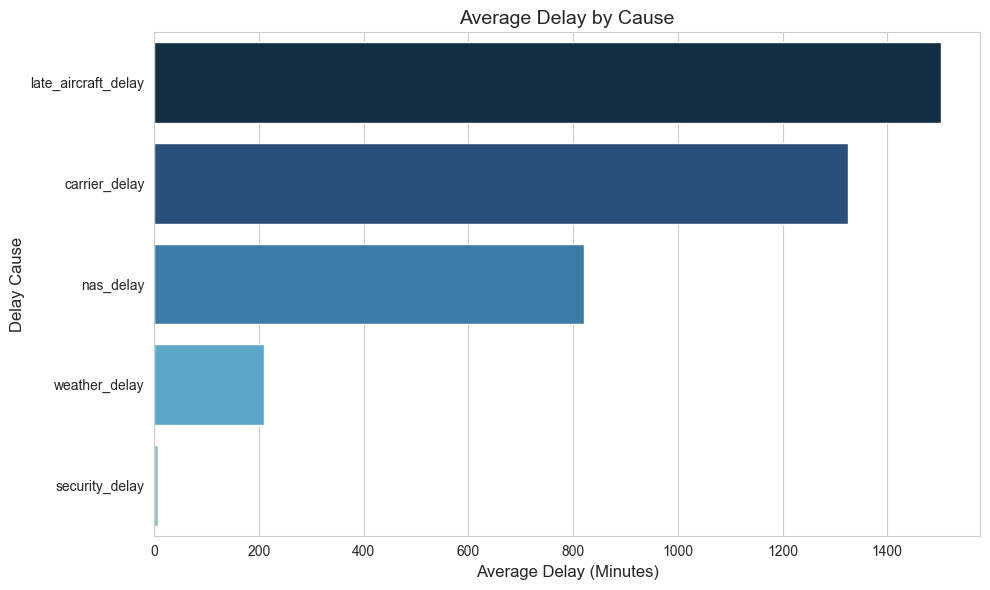

In [ ]:
# Average Delay by Cause
delay_causes = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

cause_avg = df[delay_causes].mean().sort_values(ascending=False).reset_index()
cause_avg.columns = ['Cause', 'Average Delay (Minutes)']

plt.figure(figsize=(10, 6))
sns.barplot(x='Average Delay (Minutes)', y='Cause', data=cause_avg, palette=palette)
plt.title("Average Delay by Cause", fontsize=14)
plt.xlabel("Average Delay (Minutes)", fontsize=12)
plt.ylabel("Delay Cause", fontsize=12)
plt.tight_layout()
plt.savefig('p10.png')

plt.show()


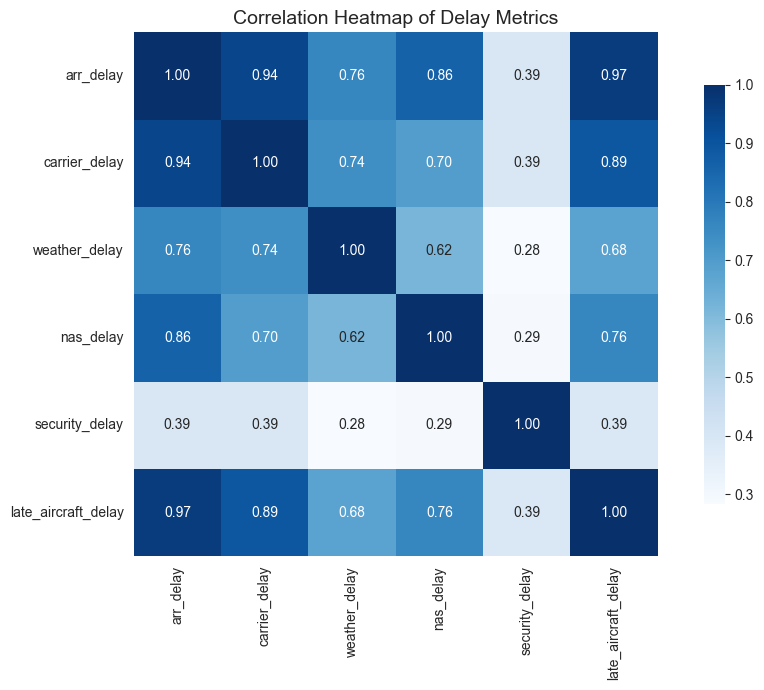

In [ ]:
# Correlation Heatmap of Delay Metrics
delay_columns = [
    'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
    'security_delay', 'late_aircraft_delay'
]

plt.figure(figsize=(10, 7))
corr = df[delay_columns].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', square=True, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap of Delay Metrics", fontsize=14)
plt.tight_layout()
plt.savefig('p11.png')

plt.show()



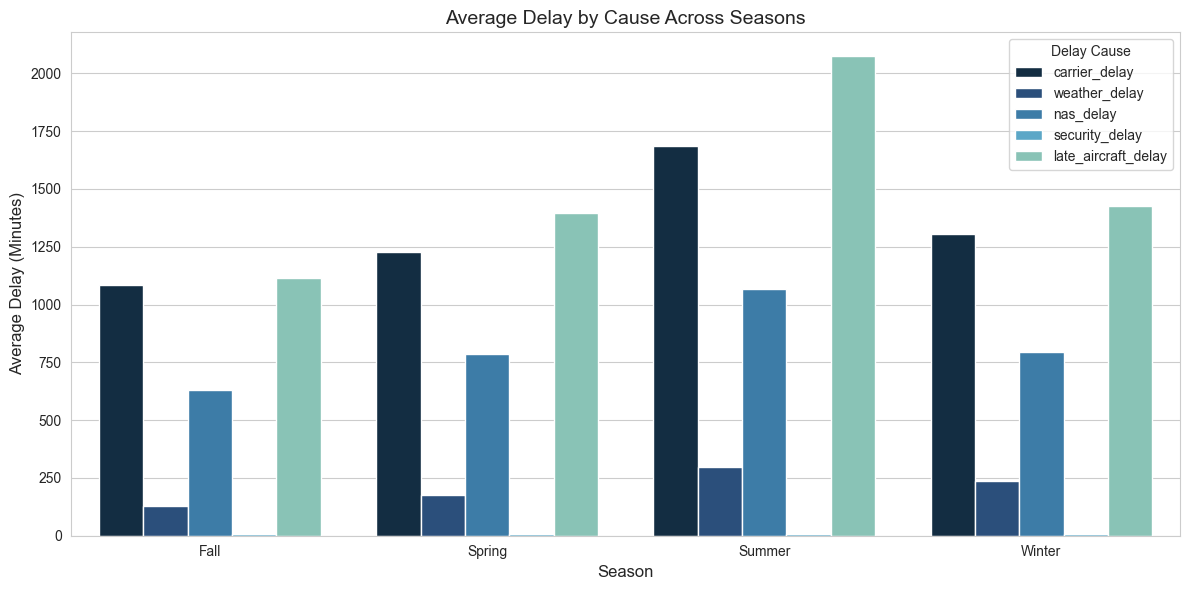

In [ ]:
# Group delay causes by season
delay_causes = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
season_cause_avg = df.groupby('season')[delay_causes].mean().reset_index()

season_cause_melted = season_cause_avg.melt(id_vars='season', var_name='Cause', value_name='Avg Delay')

plt.figure(figsize=(12, 6))
sns.barplot(data=season_cause_melted, x='season', y='Avg Delay', hue='Cause')
plt.title("Average Delay by Cause Across Seasons", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Delay (Minutes)", fontsize=12)
plt.legend(title="Delay Cause")
plt.tight_layout()
plt.savefig('p12.png')

plt.show()



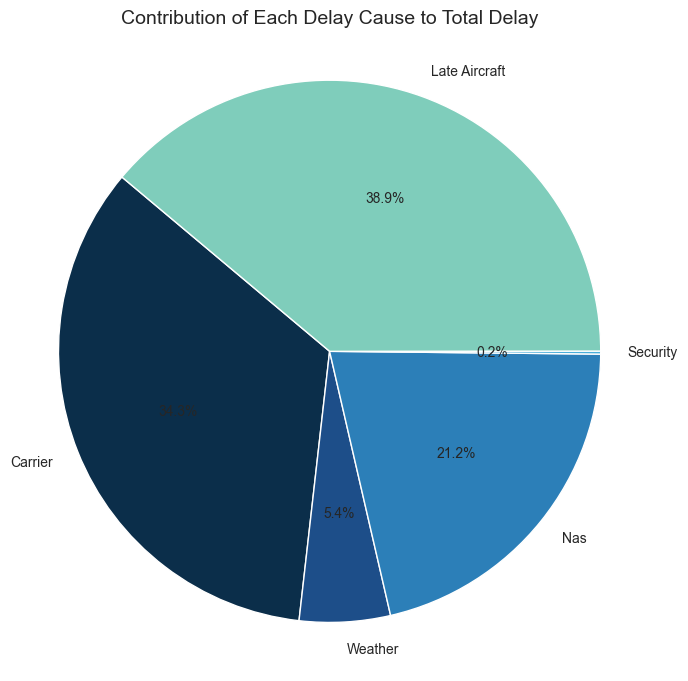

In [ ]:
# Total delay from each reason
total_delay = df[delay_causes].sum()
total_delay_percent = (total_delay / total_delay.sum()) * 100

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    total_delay_percent,
    labels=total_delay.index.str.replace('_delay', '').str.replace('_', ' ').str.title(),
    autopct='%1.1f%%',
    startangle=140,
    colors=palette
)
plt.title("Contribution of Each Delay Cause to Total Delay", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.savefig('p13.png')

plt.show()


In [ ]:
print(df.columns.tolist())


['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'season']


In [ ]:
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
season                   0
dtype: int64

In [ ]:
# Drop rows with missing values as they constitute a small % of data
df = df.dropna().reset_index(drop=True)

## Feauture Engineering

In [ ]:
def engineer_features(df):
    # Basic Rate-Based Features
    df['delay_rate'] = df['arr_del15'] / df['arr_flights']
    df['cancel_rate'] = df['arr_cancelled'] / df['arr_flights']
    df['divert_rate'] = df['arr_diverted'] / df['arr_flights']
    df['avg_delay_per_flight'] = df['arr_delay'] / df['arr_flights']

    # Delay Cause Rates
    df['carrier_delay_rate'] = df['carrier_ct'] / df['arr_flights']
    df['weather_delay_rate'] = df['weather_ct'] / df['arr_flights']
    df['nas_delay_rate'] = df['nas_ct'] / df['arr_flights']
    df['security_delay_rate'] = df['security_ct'] / df['arr_flights']
    df['late_aircraft_delay_rate'] = df['late_aircraft_ct'] / df['arr_flights']

    # Proportion of Delay Minutes
    total_delay = df['arr_delay'].replace(0, 1e-6)
    df['prop_carrier_delay'] = df['carrier_delay'] / total_delay
    df['prop_weather_delay'] = df['weather_delay'] / total_delay
    df['prop_nas_delay'] = df['nas_delay'] / total_delay
    df['prop_security_delay'] = df['security_delay'] / total_delay
    df['prop_late_aircraft_delay'] = df['late_aircraft_delay'] / total_delay

    # Operational Flag
    threshold = df['arr_flights'].quantile(0.75)
    df['is_hub_airport'] = (df['arr_flights'] > threshold).astype(int)

    # Delay Risk Label
    def label_delay_risk(rate):
        if rate < 0.10:
            return 'Low'
        elif rate < 0.25:
            return 'Moderate'
        else:
            return 'High'

    df['delay_risk'] = df['delay_rate'].apply(label_delay_risk)

    return df


df = engineer_features(df)
#binary classification target
df['is_delayed'] = (df['delay_rate'] >= 0.15).astype(int)


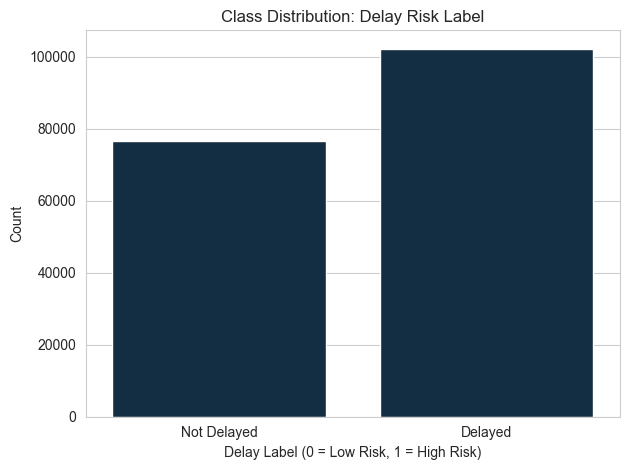

In [ ]:
sns.countplot(x='is_delayed', data=df)
plt.title("Class Distribution: Delay Risk Label")
plt.xlabel("Delay Label (0 = Low Risk, 1 = High Risk)")
plt.ylabel("Count")
plt.xticks([0,1], ['Not Delayed', 'Delayed'])
plt.tight_layout()
plt.savefig('dealy_bar.png')
plt.show()

# Classification Model

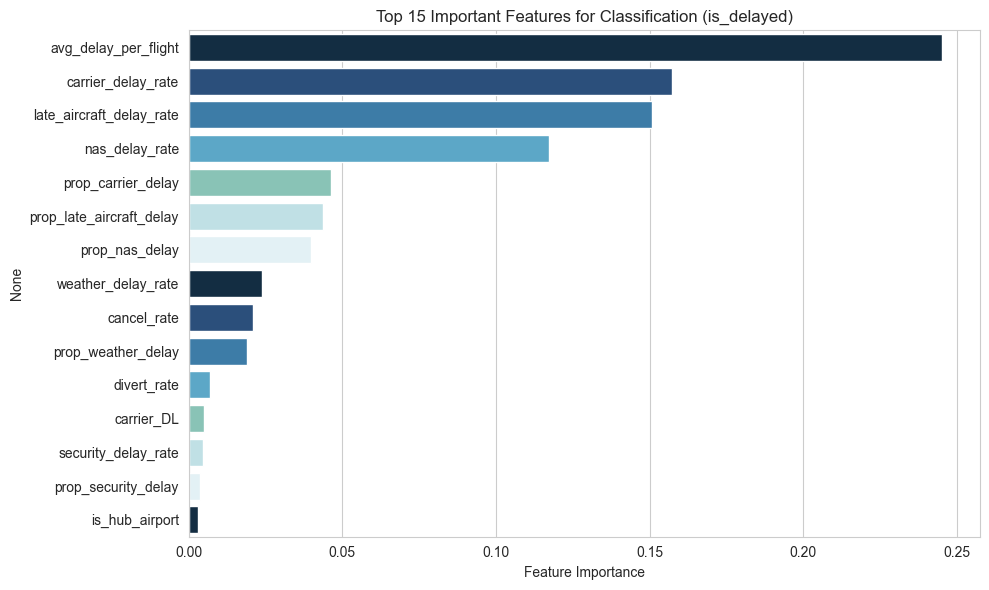

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# features and categorical columns
categorical_cols = ['carrier', 'airport', 'month']
numeric_cols = [
    'cancel_rate', 'divert_rate', 'avg_delay_per_flight',
    'carrier_delay_rate', 'weather_delay_rate', 'nas_delay_rate',
    'security_delay_rate', 'late_aircraft_delay_rate',
    'prop_carrier_delay', 'prop_weather_delay', 'prop_nas_delay',
    'prop_security_delay', 'prop_late_aircraft_delay',
    'is_hub_airport'
]

# train-test split
X = df[categorical_cols + numeric_cols]
y = df['is_delayed']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# One-hot encoding categorical columns
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Random Forest Classifier Pipeline
clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])


clf.fit(X_train, y_train)

# Extracting feature importances
encoded_cols = clf.named_steps['preprocess'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = list(encoded_cols) + numeric_cols

importances = clf.named_steps['model'].feature_importances_
feat_imp = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

# Top 15 Features
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.head(15), y=feat_imp.head(15).index, palette=palette)
plt.title("Top 15 Important Features for Classification (is_delayed)")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.savefig('clf_ft.png')
plt.show()


 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     15301
           1       0.98      0.97      0.98     20449

    accuracy                           0.98     35750
   macro avg       0.97      0.98      0.97     35750
weighted avg       0.98      0.98      0.98     35750


 Confusion Matrix:


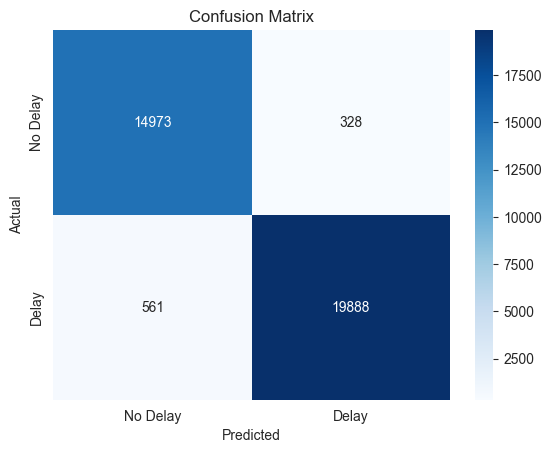


 ROC-AUC Score: 0.9979


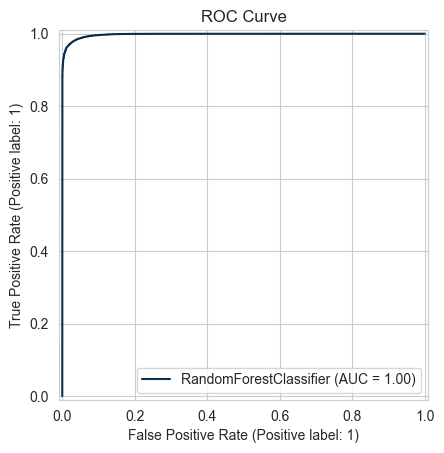

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns


y = df['is_delayed']

# Features (based on importance ranking)
top_features = [
    'avg_delay_per_flight', 'carrier_delay_rate', 'late_aircraft_delay_rate',
    'nas_delay_rate', 'prop_carrier_delay', 'prop_late_aircraft_delay',
    'prop_nas_delay', 'weather_delay_rate', 'cancel_rate', 'prop_weather_delay'
]

X = df[top_features]

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


rf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]


print(" Classification Report:")
print(classification_report(y_test, y_pred))

print("\n Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('clf_heat.png')
plt.show()

print(f"\n ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve")
plt.show()


In [ ]:
train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 0.9846
Test Accuracy: 0.9751


# OAI

In [ ]:
df['controllable_delay'] = df['carrier_delay'] + df['late_aircraft_delay']
df['oai_score'] = df['controllable_delay'] / df['arr_delay'].replace(0, 1e-6)  # avoid divide-by-zero


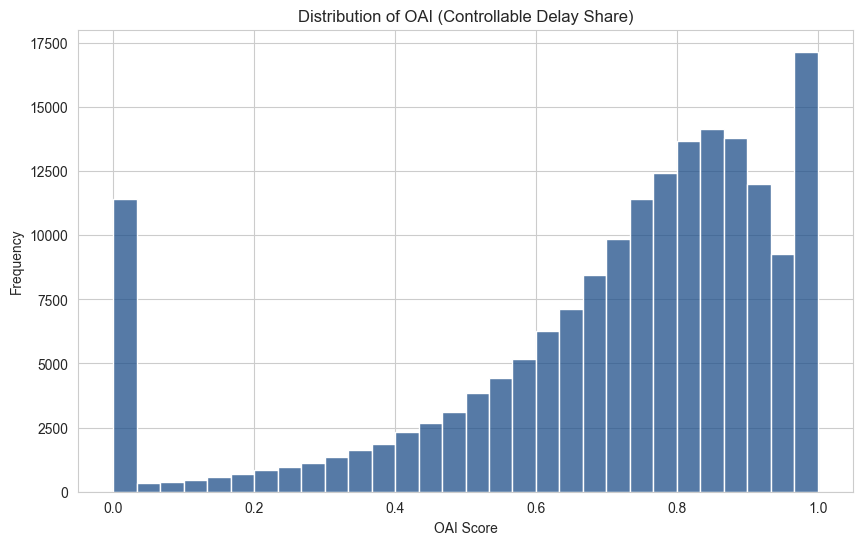

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['oai_score'], bins=30, color=palette[1])
plt.title("Distribution of OAI (Controllable Delay Share)")
plt.xlabel("OAI Score")
plt.ylabel("Frequency")
plt.savefig('oai.png')
plt.show()


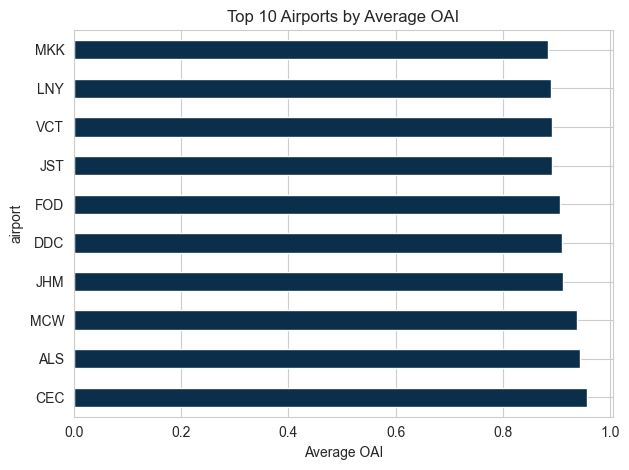

In [ ]:
df.groupby('airport')['oai_score'].mean().sort_values(ascending=False).head(10)
df.groupby('airport')['oai_score'].mean().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Airports by Average OAI")
plt.xlabel("Average OAI")
plt.tight_layout()


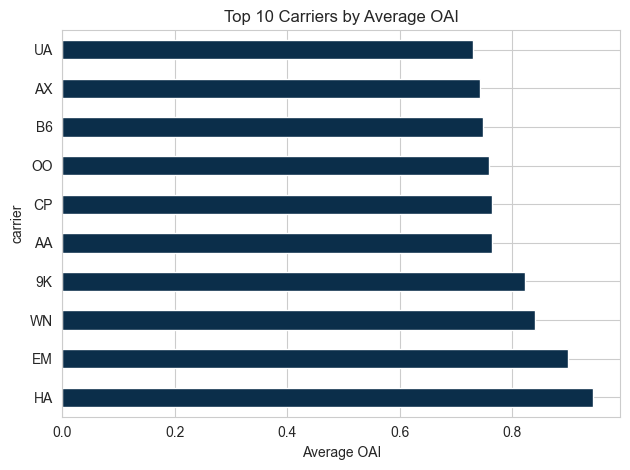

In [ ]:
df.groupby('carrier')['oai_score'].mean().sort_values(ascending=False).head(10)
df.groupby('carrier')['oai_score'].mean().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Carriers by Average OAI")
plt.xlabel("Average OAI")
plt.tight_layout()


# Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# 1. Define target and features
X = df[categorical_cols + numeric_cols]
y = df['arr_delay']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Reuse preprocessor
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# 4. Create pipeline
reg_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42))
])

# 5. Fit the model
reg_model.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = reg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" MAE: {mae:.2f} minutes")
print(f" RMSE: {rmse:.2f} minutes")
print(f" R² Score: {r2:.4f}")


 MAE: 1731.37 minutes
 RMSE: 5568.20 minutes
 R² Score: 0.7656


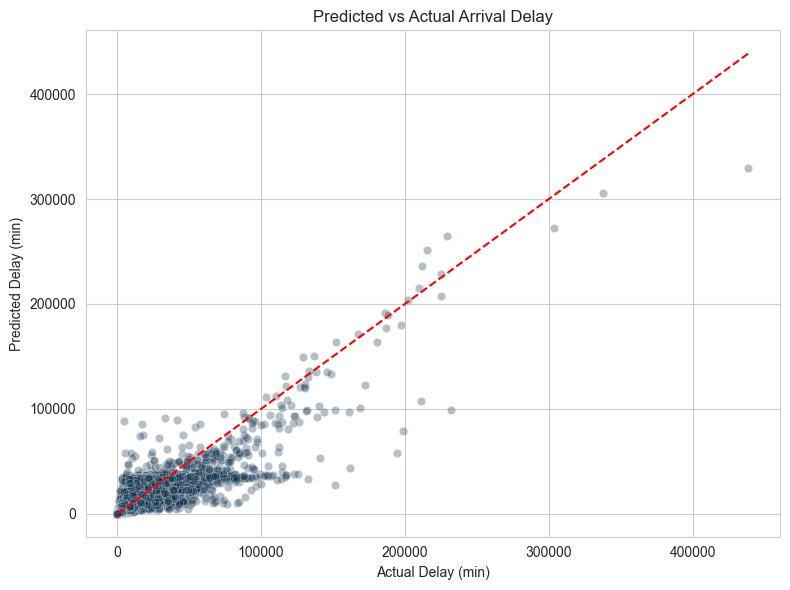

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Delay (min)")
plt.ylabel("Predicted Delay (min)")
plt.title("Predicted vs Actual Arrival Delay")
plt.tight_layout()
plt.show()


### the results with random forest were not that good, switching to LightGBM before that also doing outlier treatment

In [ ]:
df['arr_delay_capped'] = df['arr_delay'].clip(upper=3000)
# as it contains outlier and that may affect the model

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Using capped delay
X = df[categorical_cols + numeric_cols]
y = df['arr_delay_capped']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding for categoricals
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# LightGBM Regressor pipeline
lgbm_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42))
])

lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" MAE (Capped): {mae:.2f} min")
print(f" RMSE (Capped): {rmse:.2f} min")
print(f" R² Score: {r2:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4155
[LightGBM] [Info] Number of data points in the train set: 142997, number of used features: 433
[LightGBM] [Info] Start training from score 1300.342175
 MAE (Capped): 238.54 min
 RMSE (Capped): 365.11 min
 R² Score: 0.8945


### though the results have improved in LightGBM as compared to Random Forest, now trying Hyperparameter Tuning on LightGBM to further optimize the performance
### Also including the OAI score as a feature

In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

# Adding OAI score as a feature
df['controllable_delay'] = df['carrier_delay'] + df['late_aircraft_delay']
df['oai_score'] = df['controllable_delay'] / df['arr_delay'].replace(0, 1e-6)

categorical_cols = ['carrier', 'airport', 'month']
numeric_cols = [
    'cancel_rate', 'divert_rate', 'avg_delay_per_flight',
    'carrier_delay_rate', 'weather_delay_rate', 'nas_delay_rate',
    'security_delay_rate', 'late_aircraft_delay_rate',
    'prop_carrier_delay', 'prop_weather_delay', 'prop_nas_delay',
    'prop_security_delay', 'prop_late_aircraft_delay',
    'is_hub_airport', 'oai_score'
]


X = df[categorical_cols + numeric_cols]
y = df['arr_delay_capped']

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Lightgbm Hyperparameter Tuning
param_fine = {
    'n_estimators': [250, 300, 350],
    'learning_rate': [0.08, 0.1, 0.12],
    'max_depth': [18, 20, 22],
    'num_leaves': [90, 100, 110],
    'min_child_samples': [5, 10, 15]
}

lgbm_base = LGBMRegressor(random_state=42)

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', lgbm_base)
])

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions={f'regressor__{k}': v for k, v in param_fine.items()},
    n_iter=20,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_


y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(" Best Parameters:", random_search.best_params_)
print(f" MAE (Tuned + OAI): {mae:.2f} min")
print(f" RMSE (Tuned + OAI): {rmse:.2f} min")
print(f" R² Score (Tuned + OAI): {r2:.4f}")



Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4420
[LightGBM] [Info] Number of data points in the train set: 142997, number of used features: 439
[LightGBM] [Info] Start training from score 1300.342175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
 Best Parameters: {'regressor__num_leaves': 110, 'regressor__n_estimators': 350, 'regressor__min_child_samples': 15, 'regressor__max_depth': 22, 'regressor__learning_rate': 0.1}
 MAE (Tuned + OAI): 199.42 min
 RMSE (Tuned + OAI): 315.29 min
 R² Score (Tuned + OAI): 0.9213


## Finalising the tuned LightGBM model

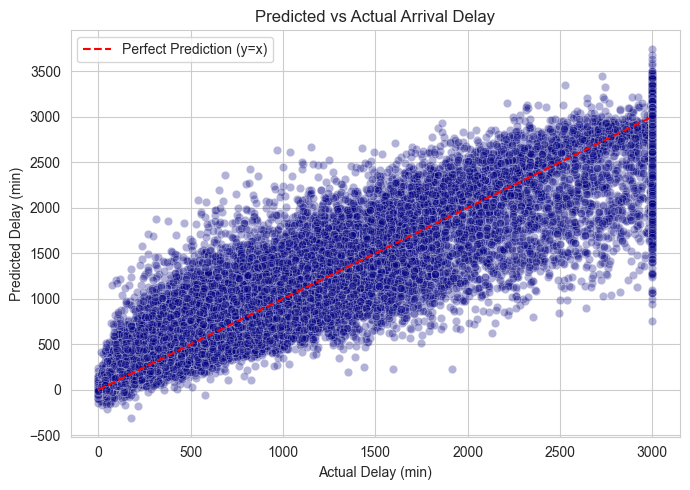

In [ ]:

plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3, color='navy')  # 🔹 Add actual data points
plt.plot([0, 3000], [0, 3000], color='red', linestyle='--', label='Perfect Prediction (y=x)')
plt.xlabel("Actual Delay (min)")
plt.ylabel("Predicted Delay (min)")
plt.title("Predicted vs Actual Arrival Delay")
plt.legend()
plt.tight_layout()
plt.show()


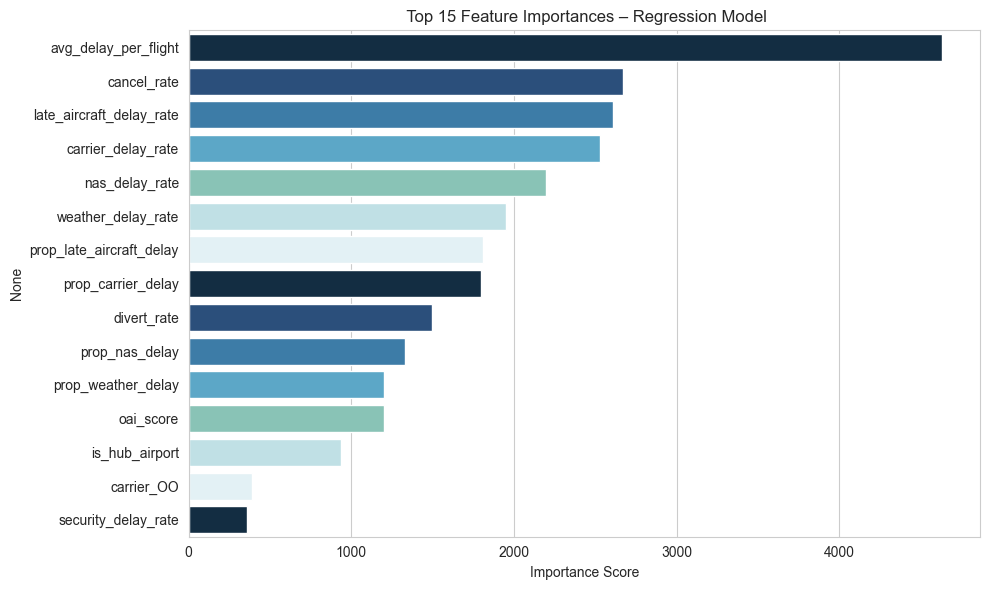

In [ ]:

encoded_cols = best_model.named_steps['preprocess'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = list(encoded_cols) + numeric_cols

# feature importances
importances = best_model.named_steps['regressor'].feature_importances_
feat_imp = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

# Top 15
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.head(15), y=feat_imp.head(15).index, palette=palette)
plt.title(" Top 15 Feature Importances – Regression Model")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig('regression_ft.png')
plt.show()


In [ ]:
# Model Interpretability Approach
# Due to computational constraints, advanced interpretability techniques like SHAP and permutation importance were not used in this project.

# Instead, feature importance was extracted directly from the trained models (Random Forest and LightGBM), using their built-in .feature_importances_ method.

# This method still provided meaningful global insights into key drivers of flight delays, such as avg_delay_per_flight, carrier_delay_rate, and oai_score, while ensuring training time and runtime remained efficient.